In [15]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage import io, img_as_float32, util, color, transform, filters

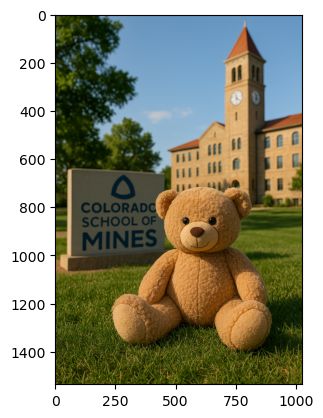

In [3]:
img_rgb = io.imread('data/Mines_Teddy_Bear.png')
plt.imshow(img_rgb)

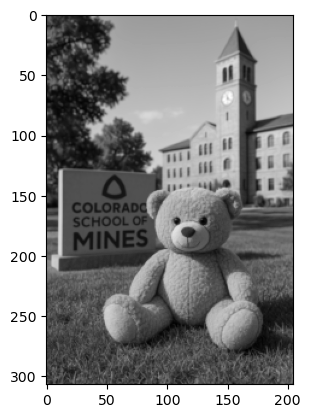

In [7]:
img_gray = img_as_float32(color.rgb2gray(img_rgb))
img = transform.rescale(img_gray, 1/5)
plt.imshow(img, cmap="gray")

### Laplacian pyramid

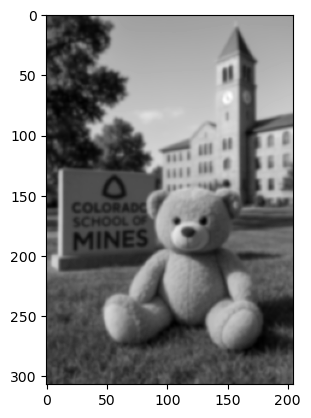

In [24]:
img1 = copy.deepcopy(img)
img1_filt = filters.gaussian(img1, sigma=1)
plt.imshow(img1_filt, cmap='gray')

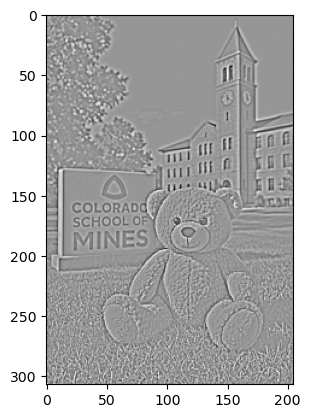

In [25]:
img1_res = img1 - img1_filt
plt.imshow(img1_res+0.5, cmap='gray')

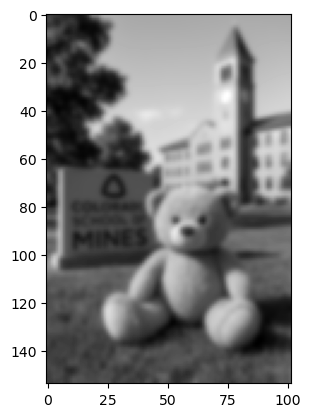

In [27]:
img2 = transform.rescale(img1, 0.5, anti_aliasing=False)
img2_filt = filters.gaussian(img2, sigma=1)
plt.imshow(img2_filt, cmap='gray')

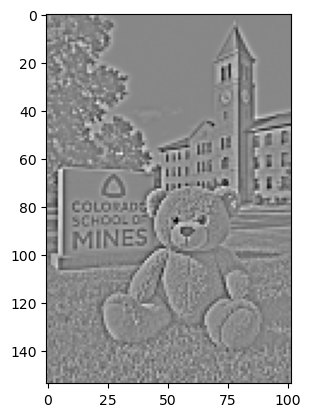

In [28]:
img2_res = img2 - img2_filt
plt.imshow(img2_res+0.5, cmap='gray')

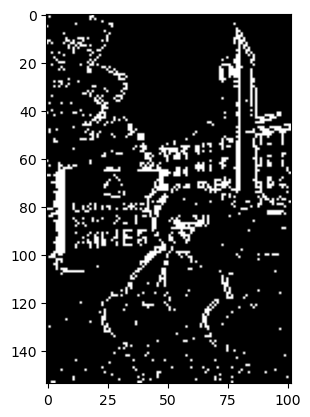

In [47]:
# show edges
plt.imshow(np.logical_or(img2_res>0.07, img2_res<-0.07), cmap='gray')

### Fourier Transform

In [49]:
from scipy.fft import fft2, fftshift

24519.996
0.007839619


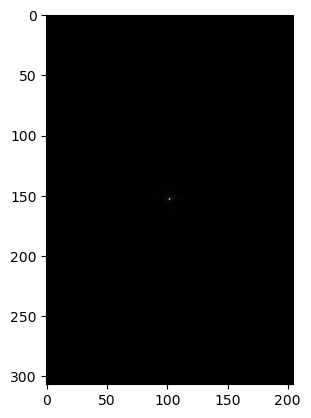

In [64]:
img_fur = fftshift(fft2(img))
img_fur_mag = np.abs(img_fur)
img_fur_pha = np.angle(img_fur)

plt.imshow(img, cmap='gray')
plt.imshow(img_fur_mag, cmap='gray')
print(img_fur_mag.max())
print(img_fur_mag.min())
# img_fur_mag

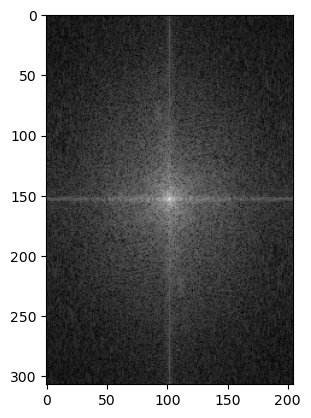

In [ ]:
# Apply log transform for better visibility
img_fur_mag_log = np.log(1+img_fur_mag) # add 1 to avaoid log(0)
plt.imshow(img_fur_mag_log, cmap='gray')

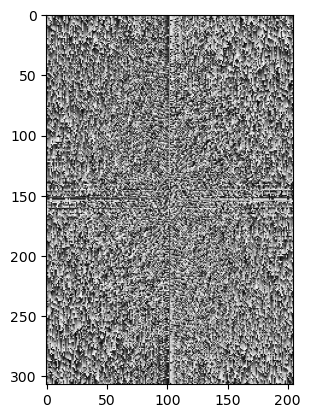

In [67]:
plt.imshow(img_fur_pha, cmap='gray')

### Reconstruct Image from Fourier Transform

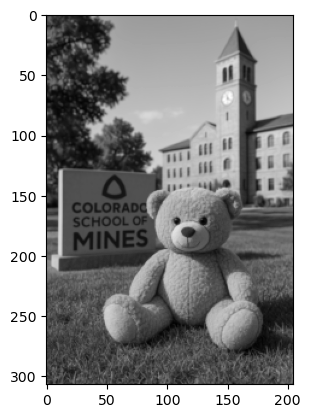

In [69]:
img_reconst = np.fft.ifft2(img_fur)
img_reconst = np.abs(img_reconst) # remove small imaginary parts due to numerical errors
plt.imshow(img_reconst, cmap='gray')